In [56]:
'''R-squared value

R-sqaured is a statistic that will give some information about the goodness of fit of a model. In regression, the R-squared coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-squared value of 1 indicates that the regression predictions perfectly fit the data.

Custom accuracy

I have defined my own function to measure accuracy of model. Custom Accuracy is defined on the basis of difference between the predicted score and actual score. If this difference falls below a particular thresold, we count it as a correct prediction.'''


'R-squared value\n\nR-sqaured is a statistic that will give some information about the goodness of fit of a model. In regression, the R-squared coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-squared value of 1 indicates that the regression predictions perfectly fit the data.\n\nCustom accuracy\n\nI have defined my own function to measure accuracy of model. Custom Accuracy is defined on the basis of difference between the predicted score and actual score. If this difference falls below a particular thresold, we count it as a correct prediction.'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso

In [2]:
dataset = pd.read_csv('t20.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

In [3]:
print(dataset.shape)
print(dataset.head())

(180777, 15)
   mid        date          venue bat_team  bowl_team         batsman bowler  \
0    1  2005-06-13  The Rose Bowl  England  Australia  ME Trescothick  B Lee   
1    1  2005-06-13  The Rose Bowl  England  Australia  ME Trescothick  B Lee   
2    1  2005-06-13  The Rose Bowl  England  Australia        GO Jones  B Lee   
3    1  2005-06-13  The Rose Bowl  England  Australia        GO Jones  B Lee   
4    1  2005-06-13  The Rose Bowl  England  Australia        GO Jones  B Lee   

   runs  wickets  overs  runs_last_5  wickets_last_5  striker  non-striker  \
0     0        0    0.1            0               0        0            0   
1     1        0    0.2            1               0        1            0   
2     1        0    0.3            1               0        1            0   
3     1        0    0.4            1               0        1            0   
4     1        0    0.5            1               0        1            0   

   total  
0    179  
1    179  
2   

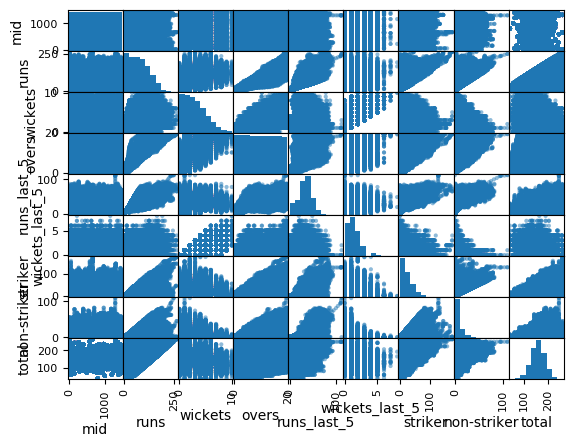

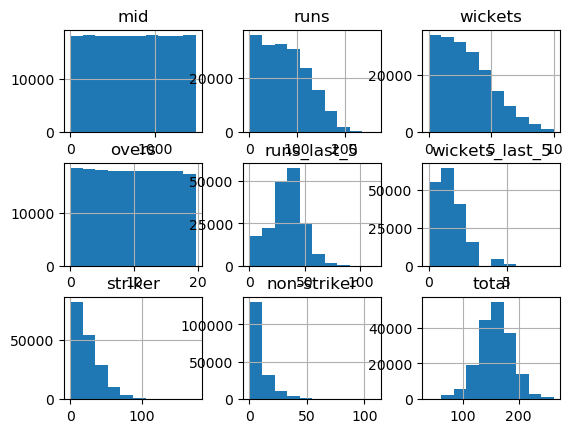

In [5]:
#Data Visualization
scatter_matrix(dataset)
plt.show()
dataset.hist()                       #histogram
plt.show()  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train, X_test, y_train, y_test

(array([[ 0.66824573,  1.63652403,  1.44399474,  0.09431634, -0.81246913],
        [-0.07305928,  0.68437047,  0.05810864, -0.41689723,  0.18381989],
        [-0.38193637,  0.20829369, -0.21906858,  0.24768042, -0.81246913],
        ...,
        [ 1.18304088,  0.68437047,  1.14949394, -0.31465452, -0.31432462],
        [-0.29956915, -0.74385987, -0.60018726, -0.41689723, -0.31432462],
        [-0.97909875, -1.21993665, -1.10257097, -0.51913995,  0.38307769]]),
 array([[-0.34075276, -0.74385987, -0.4269515 ,  0.81001535,  0.28344879],
        [ 0.33877684,  1.63652403,  1.01090533, -1.08147488, -0.51358242],
        [-0.71140527, -1.21993665, -0.92933521, -0.00792637,  0.78159329],
        ...,
        [ 0.09167517,  0.68437047,  0.42190374, -0.26353316, -0.61321132],
        [-0.32016095, -0.74385987, -0.80807018,  1.01450078, -0.81246913],
        [ 0.17404239,  0.20829369,  0.31796228, -0.36577587, -0.21469572]]),
 array([116, 167, 155, ..., 187, 170, 187]),
 array([179, 123, 137, ..

In [7]:
X,y

(array([[0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
        [1.00e+00, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00],
        [1.00e+00, 0.00e+00, 3.00e-01, 1.00e+00, 0.00e+00],
        ...,
        [1.84e+02, 6.00e+00, 1.94e+01, 1.30e+01, 5.00e+00],
        [1.86e+02, 6.00e+00, 1.95e+01, 1.30e+01, 7.00e+00],
        [1.90e+02, 6.00e+00, 1.96e+01, 1.30e+01, 1.10e+01]]),
 array([179, 179, 179, ..., 190, 190, 190]))

In [8]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [34]:
#Linear Regression
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
lin_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , lin_acc)


R-squared value: 52.531187975912964
Custom accuracy: 80.75229560792123


In [33]:
#Random Forest
ran = RandomForestRegressor(n_estimators=100,max_features=None)
ran.fit(X_train,y_train)
y_pred = ran.predict(X_test)
score = ran.score(X_test,y_test)*100
print("R-squared value:" , score)
ran_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , ran_acc)


R-squared value: 64.66354837655327
Custom accuracy: 86.42991481358557


In [12]:
#lasso
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
              
    def fit( self, X, Y ) :
          
        self.m, self.n = X.shape
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
            
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
   
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [15]:
model = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500)

In [16]:
model.fit( X_train, y_train )

In [17]:
Y_pred = model.predict( X_test )

In [18]:
print( "Predicted values ", np.round(Y_pred[:5],6))

Predicted values  [166.86945  124.634022 170.106154 133.570586 160.53833 ]


In [51]:
model_acc=custom_accuracy(y_test,Y_pred,25)


In [32]:
#K Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test,y_test)*100
print("R-squared value:" , score)
knn_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , knn_acc)


R-squared value: 37.371390640557586
Custom accuracy: 76.30711361876314


In [20]:
cur_score=int(input('Current Score: '))
cur_wickets=int(input('Current  Wickets: '))
cur_overs=int(input('Current Overs: '))
cur_striker=int(input('Current Striker Score: '))
cur_non_striker=int(input('Current Non-Striker Score: '))

Current Score: 135
Current  Wickets: 5
Current Overs: 15
Current Striker Score: 5
Current Non-Striker Score: 10


In [21]:
if cur_score<cur_striker+cur_non_striker or cur_overs<0 or cur_overs>50:
    print('Error in Input')
else:
    new_prediction = lin.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Linear Regression - Prediction score:" , new_prediction)
    new_prediction = ran.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Random Forest Regression - Prediction score:" , new_prediction)
    new_prediction = knn.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("K Nearest Neighbours - Prediction score:" , new_prediction)
    new_prediction = model.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Lasso Regression - Prediction score:" , new_prediction)

Linear Regression - Prediction score: [173.25261394]
Random Forest Regression - Prediction score: [182.27]
K Nearest Neighbours - Prediction score: [156]
Lasso Regression - Prediction score: [164.5399251]


In [28]:
las_acc=custom_accuracy(Y_pred,y_test,25)

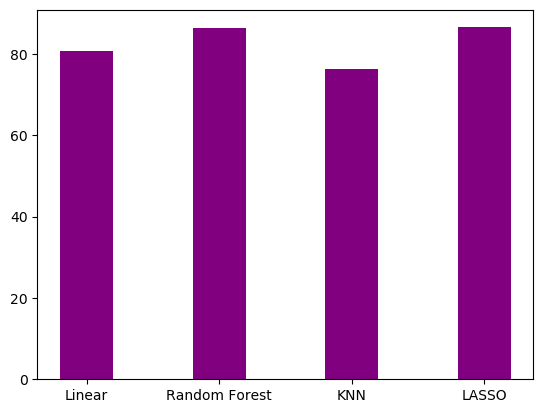

In [53]:
a=[]
a.append(lin_acc)
a.append(ran_acc)
a.append(knn_acc)
a.append(las_acc)
b=['Linear','Random Forest','KNN','LASSO']
plt.bar(b, a, color ='purple',width = 0.4)
plt.show()

In [36]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [38]:
m=LinearRegression(learning_rate=0.01,iterations=100)

In [39]:
m.fit(X_train,y_train)

In [41]:
new_prediction = m.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
print("Linear Regression - Prediction score:" , new_prediction)

Linear Regression - Prediction score: [129.67632891]


[80.75229560792123, 86.56488549618321]


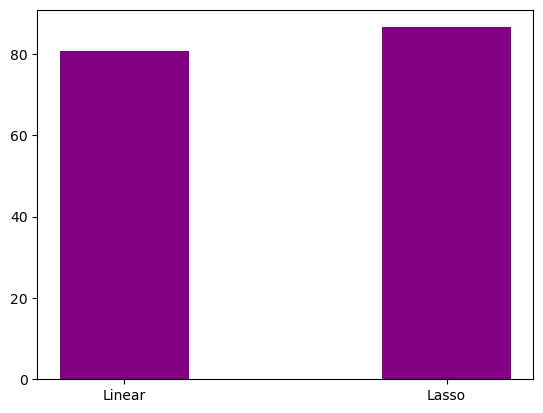

In [55]:
c=[]
c.append(lin_acc)
c.append(las_acc)
d=['Linear','Lasso']
plt.bar(d, c, color ='purple',width = 0.4)
print(c)
plt.show()